### Word Embedding
First of all let's do a quick review on Word Embedding. The problem with
existing word encoding approaches, e.g. `TF-IDF` and `Bag of Words` is that
they do not preserve context of each sentence. You already know that
the context is really important and can change a word's meaning.

The other problem worth mentioning is the `Curse of Dimensionality`. For a big
corpora consisting of 1 million unique words, the simple `One-Hot-Encoding`
approach for a 5 words sentence would produce a 1 million dimension vector
with only 5 dimensions set to 1 and others to 0.

#### Word2Vec
`Word2Vec` is a `Word Embedding` model developed at Google. `Word Embedding`
is a way to represent words in a numerical format where each vector not only
preserve the context of the word but also has a low dimension.

Loosely speaking, `Word2Vec` takes advantage of Neural Networks to train
over existing text documents to vectorize each unique word in that corpora
by taking into account the presence of surrounding words (the context) too.

#### GloVe (Global Vector)
By explicitly taking the advantage of `Co-Occurrence` matrix
(which shows how many times two different words appear next to each other),
the Count-Based `GloVe` model produces `Word Embedding` vectors to represent words. The main
difference with `Word2Vec` is that there is no Neural Network and this method
takes advantage of `Co-Occurrence` matrix and `Logistic Regression` to predict
the surrounding words (the context)

#### Enough of explanation, let's see it in action

### Data
We use publicly available data as form of 50K reviews on IMDB website.

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', -1)

In [2]:
movie_reviews = pd.read_csv('~/PycharmProjects/macai/nlp/data/IMDB.csv',
                            # nrows=1000
                            )
movie_reviews.shape

(50000, 2)

In [3]:
movie_reviews.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [4]:
import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews)

Almost equal, let's make sure tho!

In [5]:
print(movie_reviews[movie_reviews['sentiment']=='positive'].shape)
print(movie_reviews[movie_reviews['sentiment']=='negative'].shape)

(25000, 2)
(25000, 2)


Cool! That's not usually the case however, most of the time there are more
positive reviews for a movie than a negative one. Except for GoT season 8.

A lot of punctuations, special characters and `HTML` tags! Not useful
for `Sentiment Analysis`

#### Time to clear some text

In [6]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english')) 

sentences = movie_reviews['review'].tolist()
processed_sentences = []
for sentence in sentences:
    # HTML tags
    processed_sentence = re.sub(r'<[^>]+>', '', sentence)

    # No numbers
    processed_sentence = re.sub(r'\d+', '', processed_sentence)

    # No extra white space
    processed_sentence = re.sub(r'\s+', ' ', processed_sentence)

    # Only lower case
    processed_sentence = processed_sentence.lower()

    # No punctuation
    processed_sentence = processed_sentence.translate(str.maketrans('', '', string.punctuation))

    # No stop word (and lemmatize)
    processed_sentence = word_tokenize(processed_sentence)
    processed_sentence = [lemmatizer.lemmatize(w) for w in processed_sentence if not w in stop_words]
    processed_sentence = ' '.join(processed_sentence)
    processed_sentences.append(processed_sentence)

print(sentences[23])
print(processed_sentences[23])

First of all, let's get a few things straight here: a) I AM an anime fan- always has been as a matter of fact (I used to watch Speed Racer all the time in Preschool). b) I DO like several B-Movies because they're hilarious. c) I like the Godzilla movies- a lot.<br /><br />Moving on, when the movie first comes on, it seems like it's going to be your usual B-movie, down to the crappy FX, but all a sudden- BOOM! the anime comes on! This is when the movie goes WWWAAAAAYYYYY downhill.<br /><br />The animation is VERY bad & cheap, even worse than what I remember from SPEED RACER, for crissakes! In fact, it's so cheap, one of the few scenes from the movie I "vividly" remember is when a bunch of kids run out of a school... & it's the same kids over & over again! The FX are terrible, too; the dinosaurs look worse than Godzilla. In addition, the transition to live action to animation is unorganized, the dialogue & voices(especially the English dub that I viewed) was horrid & I was begging my dad

#### We like numbers
So let's encode *positive* and *negative* labels to 1 or 0 value.

In [7]:
labels = movie_reviews['sentiment']
labels = np.array(list(map(lambda sentiment: 1 if sentiment == 'positive' else 0, labels)))

#### Time to divide

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences, labels, test_size=0.20, random_state=23)

#### Embedding
First we create a word-to-index dictionary

In [9]:
from keras.preprocessing.text import Tokenizer

# Let's only care about 8000 most common words
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
len(X_train[2])
len(X_train[3])
len(X_train[4])
len(X_train[5])

Using TensorFlow backend.


194

As you can see each list has a different length (each sentence has
a different number of words!)

Let's keep it simple and 100 as the GloVe data is!

In [10]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = len(tokenizer.word_index) + 1
MAX_LEN = 100

X_train = pad_sequences(X_train, padding='post', maxlen=MAX_LEN)
X_test = pad_sequences(X_test, padding='post', maxlen=MAX_LEN)

#### Word2Vec or GloVe?
We choose `GloVe`, for no reason. Just kidding, `GloVe` is a newer
Word Embedding model and hopefully performs better in our case.

In [11]:
from numpy import asarray

embeddings_dictionary = dict()

with open('/home/szamani/PycharmProjects/macai/nlp/data/glove.6B.100d.txt', 'r', encoding="utf-8") as glove:
    for line in glove:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

Let's create the embedding matrix. Each row corresponds to the index
of the word in the review. There are 100 columns as we assume the maximum
length of each sentence (the whole review as we already got rid of
punctuations) would be 100. Each column contains the `GloVe` embedding
for the words in the review.

In [12]:
from numpy import zeros

embedding_matrix = zeros((vocab_size, MAX_LEN))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Time for deep stuff!

#### 1. Simple Dense Neural Network

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

simple_model = Sequential()
# trainable=False because the GloVe vector is already trained
embedding_layer = Embedding(vocab_size, MAX_LEN, weights=[embedding_matrix], input_length=MAX_LEN , trainable=False)
simple_model.add(embedding_layer)

simple_model.add(Flatten())
simple_model.add(Dense(1, activation='sigmoid'))

Let's compile (and not run) it

In [14]:
simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
simple_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          17574300  
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10001     
Total params: 17,584,301
Trainable params: 10,001
Non-trainable params: 17,574,300
_________________________________________________________________


Train it!

In [15]:
# Why do we keep history of epochs?
history = simple_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = simple_model.evaluate(X_test, y_test, verbose=1)

# Loss function evaluation
print('Score: ', score[0])
# Accuracy
print('Accuracy: ', score[1])

Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 2s 61us/step - loss: 0.5655 - acc: 0.7076 - val_loss: 0.5052 - val_acc: 0.7575
Epoch 2/6
32000/32000 [==============================] - 2s 50us/step - loss: 0.4601 - acc: 0.7853 - val_loss: 0.5114 - val_acc: 0.7614
Epoch 3/6
32000/32000 [==============================] - 2s 55us/step - loss: 0.4212 - acc: 0.8121 - val_loss: 0.5031 - val_acc: 0.7623
Epoch 4/6
32000/32000 [==============================] - 1s 47us/step - loss: 0.3991 - acc: 0.8234 - val_loss: 0.5183 - val_acc: 0.7596
Epoch 5/6
32000/32000 [==============================] - 2s 48us/step - loss: 0.3828 - acc: 0.8308 - val_loss: 0.5165 - val_acc: 0.7598
Epoch 6/6
10000/10000 [==============================] - 1s 54us/step
Score:  0.5344469630718232
Accuracy:  0.7573000192642212


#### Time for visualization

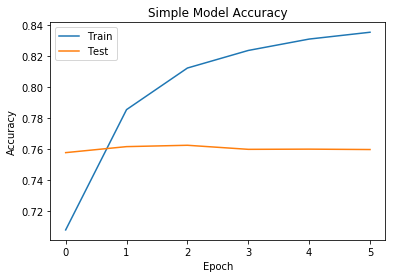

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Simple Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Overfitting on training data?

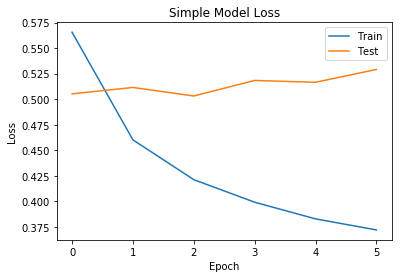

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Simple Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()


#### 2. Convolutional Neural Network
CNNs are mostly used for 2D data classification such as images.

Regular Neural Networks transform an input by putting it through
a series of hidden layers each fully connected (dense) to all neurons
in the layer before.

CNNs layers are not fully connected, they are organized in 3 dimensions.

CNNs have two components:

1. The hidden layers which do the feature extraction: Recognizing
the existence of nose, eyes, and lips in a facial recognition task.

2. The classification: where fully connected layers on top of the
extracted features (i.e. vectors and matrices) assign a probability
for predicting the class of entire object (image)

Time to code!

In [20]:
from keras.layers import GlobalMaxPooling1D
from keras.layers import Conv1D

cnn_model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=MAX_LEN , trainable=False)

cnn_model.add(embedding_layer)
# One convolution layer, features=128, kernel_size=5
cnn_model.add(Conv1D(128, 5, activation='relu'))
# One pooling layer, reduce feature size
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [21]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          17574300  
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,638,557
Trainable params: 64,257
Non-trainable params: 17,574,300
_________________________________________________________________


Train phase

In [22]:
# Be careful, it takes time!
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = cnn_model.evaluate(X_test, y_test, verbose=1)

# Loss function evaluation
print('Score: ', score[0])
# Accuracy
print('Accuracy: ', score[1])


Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 30s 924us/step - loss: 0.4685 - acc: 0.7757 - val_loss: 0.3927 - val_acc: 0.8223
Epoch 2/6
32000/32000 [==============================] - 31s 965us/step - loss: 0.3428 - acc: 0.8537 - val_loss: 0.3521 - val_acc: 0.8460
Epoch 3/6
32000/32000 [==============================] - 27s 857us/step - loss: 0.2875 - acc: 0.8829 - val_loss: 0.3546 - val_acc: 0.8457
Epoch 4/6
32000/32000 [==============================] - 25s 771us/step - loss: 0.2405 - acc: 0.9113 - val_loss: 0.3343 - val_acc: 0.8575
Epoch 5/6
32000/32000 [==============================] - 23s 718us/step - loss: 0.2050 - acc: 0.9273 - val_loss: 0.3362 - val_acc: 0.8586
Epoch 6/6
10000/10000 [==============================] - 3s 338us/step
Score:  0.3337885859489441
Accuracy:  0.8567000031471252


Visualization phase

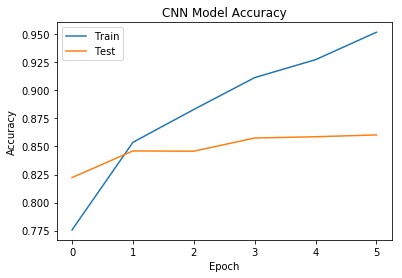

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Overfitting on training data? Still good result however, which shows that CNN
can also be used for text classification taks.

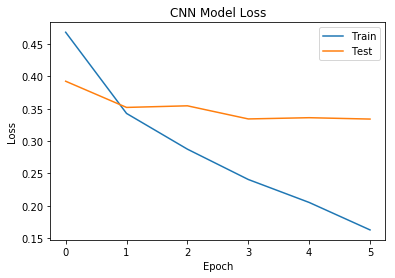

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

#### 3. Recurrent Neural Network
RNNs are proven to work well with sequence of data, such as text which is
a sequence of words. Traditional Neural Networks learn from scratch
every time, even though they may have already been trained. They do not
*remember*.

`Recurrent Neural Networks` address this issue. There are loops in their
architecture that helps them *remember* previous information and decisions.

Simple RNNs suffer from the `Gradient Vanishing` problem due to repeated
matrix multiplication performed during the training phase. It prevents
simple RNNs to really remember long term context.

`Long Short Term Memory` (LSTM) networks are example of RNNs that address
this issue by adding a *Memory Cell* to the architecture that can remember
context from the very beginning of the input through the current input.

Let's see them in action

In [26]:
from keras.layers import LSTM

lstm_model = Sequential()
embedding_layer = Embedding(vocab_size, MAX_LEN, weights=[embedding_matrix], input_length=MAX_LEN , trainable=False)
lstm_model.add(embedding_layer)
# 128 Neurons, modify it and observe what happens
lstm_model.add(LSTM(128))
lstm_model.add(Dense(1, activation='sigmoid'))

In [27]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          17574300  
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 17,691,677
Trainable params: 117,377
Non-trainable params: 17,574,300
_________________________________________________________________
None


Training

In [28]:
# This one really takes time!
history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = lstm_model.evaluate(X_test, y_test, verbose=1)

# Loss function evaluation
print('Score: ', score[0])
# Accuracy
print('Accuracy: ', score[1])


Train on 32000 samples, validate on 8000 samples
Epoch 1/6
32000/32000 [==============================] - 104s 3ms/step - loss: 0.5490 - acc: 0.7280 - val_loss: 0.4474 - val_acc: 0.8024
Epoch 2/6
32000/32000 [==============================] - 96s 3ms/step - loss: 0.4312 - acc: 0.8073 - val_loss: 0.3892 - val_acc: 0.8263
Epoch 3/6
32000/32000 [==============================] - 103s 3ms/step - loss: 0.3856 - acc: 0.8325 - val_loss: 0.3744 - val_acc: 0.8340
Epoch 4/6
32000/32000 [==============================] - 113s 4ms/step - loss: 0.3590 - acc: 0.8435 - val_loss: 0.3362 - val_acc: 0.8579
Epoch 5/6
32000/32000 [==============================] - 112s 4ms/step - loss: 0.3338 - acc: 0.8569 - val_loss: 0.3376 - val_acc: 0.8551
Epoch 6/6
10000/10000 [==============================] - 16s 2ms/step
Score:  0.3246495184183121
Accuracy:  0.8666999936103821


Visualization

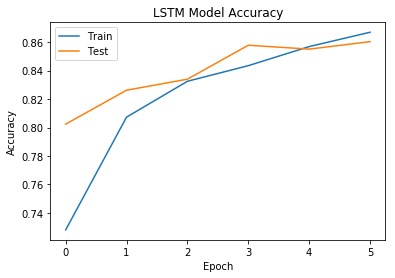

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Overfitting on training data? Not much this time, there is a very small
difference between the training and testing accuracy.

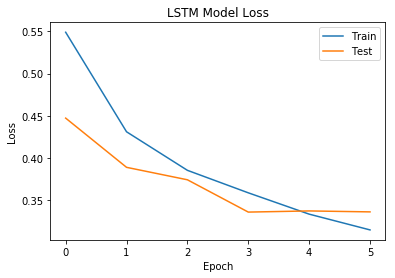

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

#### Conclusion

Although the accuracy has not increased so much comparing to CNN,
but the overfitting on train data disappears for LSTM.

